In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
import numpy as np


In [4]:
df = pd.read_csv('books.csv')

In [5]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11-01-2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [7]:


# Load the dataset
file_path = 'books.csv'
df = pd.read_csv(file_path)

# Clean column names (remove leading/trailing whitespace)
df.columns = df.columns.str.strip()

# Drop any unnamed columns (often from saving files with index)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Convert necessary columns to appropriate types
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')
df['num_pages'] = pd.to_numeric(df['num_pages'], errors='coerce')
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

# Handle missing values
df['average_rating'].fillna(df['average_rating'].mean(), inplace=True)
df['num_pages'].fillna(df['num_pages'].median(), inplace=True)
df['publication_date'].fillna(method='ffill', inplace=True)

# Normalize numerical columns
scaler = MinMaxScaler()
df[['ratings_count', 'num_pages']] = scaler.fit_transform(df[['ratings_count', 'num_pages']])

# Clean text fields
for col in ['authors', 'title', 'publisher']:
    df[col] = df[col].astype(str).str.strip()

# Preview the cleaned DataFrame
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11127 non-null  int64         
 1   title               11127 non-null  object        
 2   authors             11127 non-null  object        
 3   average_rating      11127 non-null  float64       
 4   isbn                11127 non-null  object        
 5   isbn13              11127 non-null  object        
 6   language_code       11127 non-null  object        
 7   num_pages           11127 non-null  float64       
 8   ratings_count       11127 non-null  float64       
 9   text_reviews_count  11127 non-null  int64         
 10  publication_date    11127 non-null  datetime64[ns]
 11  publisher           11127 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 1.0+ MB
None
   bookID            

C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_7856\846721449.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['average_rating'].fillna(df['average_rating'].mean(), inplace=True)
C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_7856\846721449.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

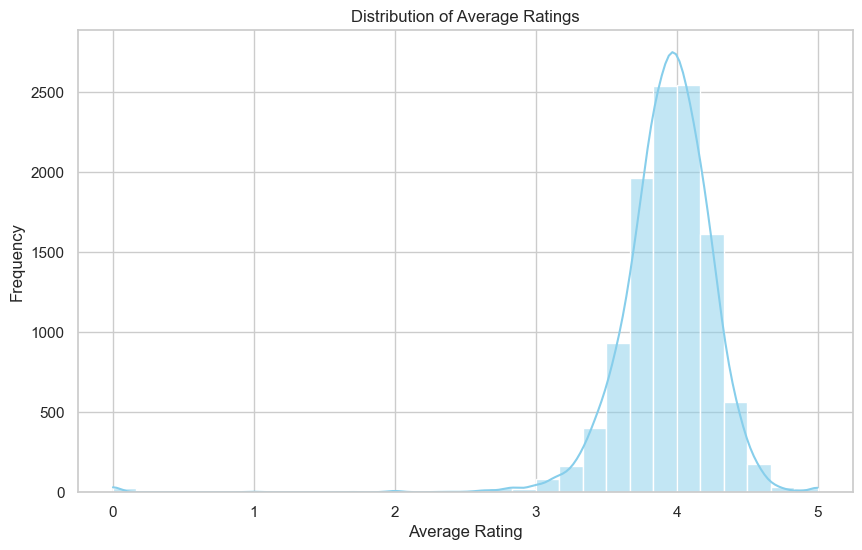

C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_7856\2319876455.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ratings_count', y='title', data=top_books, palette='Blues_d')


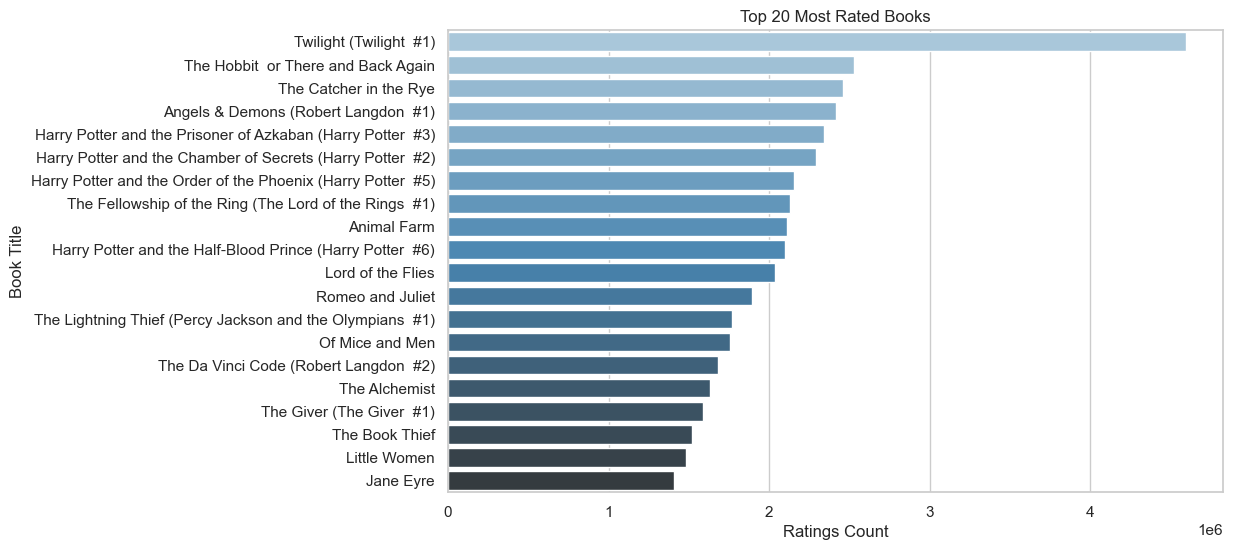

C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_7856\2319876455.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='text_reviews_count', y='title', data=top_books, palette='Purples_d')


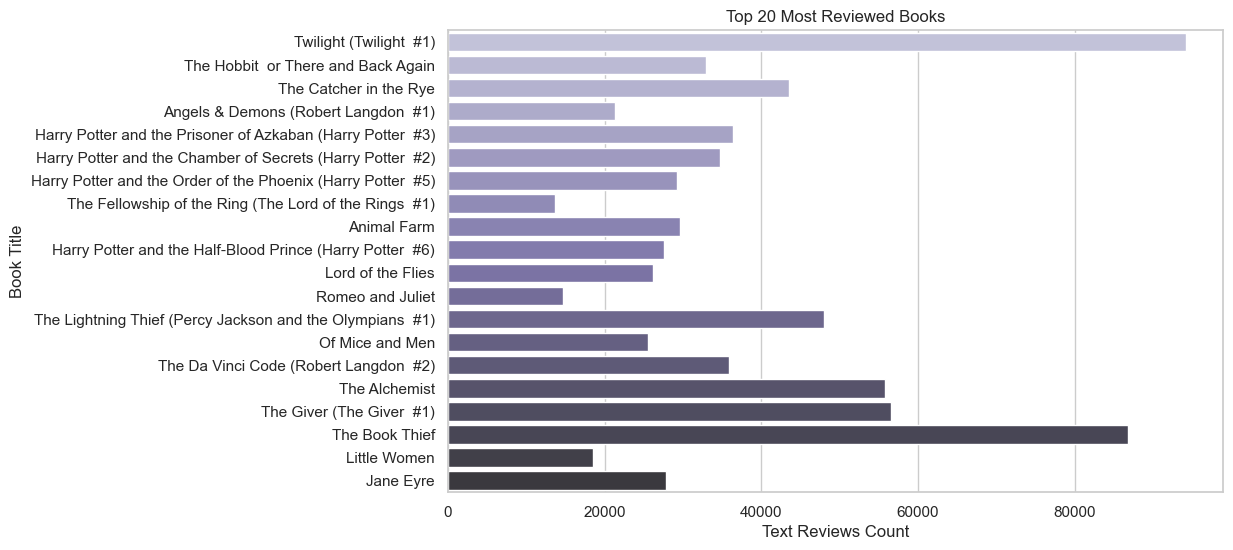

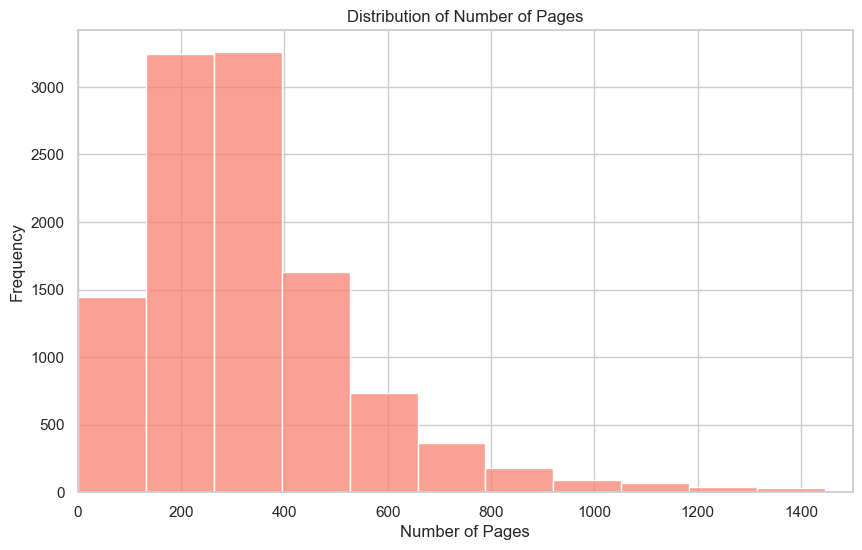

C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_7856\2319876455.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


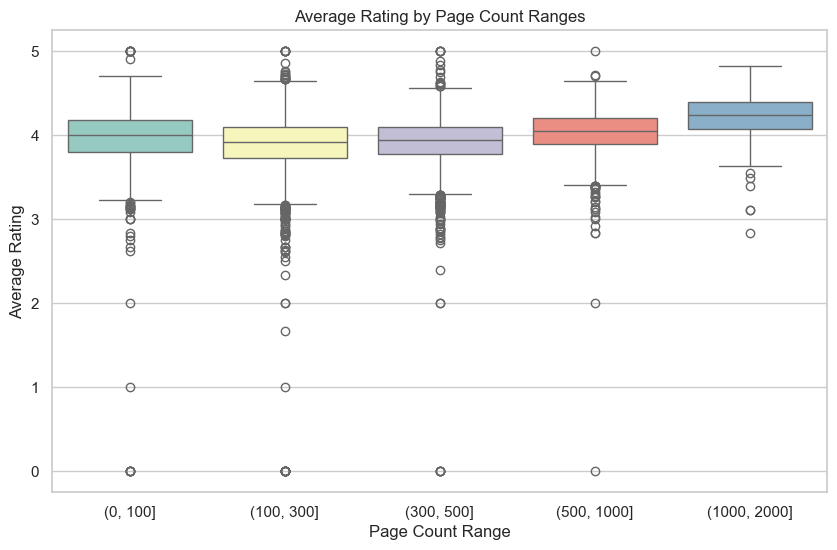

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'books.csv'
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert data types
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')
df['num_pages'] = pd.to_numeric(df['num_pages'], errors='coerce')
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
df['publication_year'] = df['publication_date'].dt.year

# Drop unnecessary columns
df = df.drop(columns=[col for col in df.columns if "unnamed" in col])

# Set up plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Ratings Analysis
plt.figure()
sns.histplot(df['average_rating'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# 2. Popularity Analysis
top_books = df.nlargest(20, 'ratings_count')

# Ratings Count
plt.figure()
sns.barplot(x='ratings_count', y='title', data=top_books, palette='Blues_d')
plt.title('Top 20 Most Rated Books')
plt.xlabel('Ratings Count')
plt.ylabel('Book Title')
plt.show()

# Text Reviews Count
plt.figure()
sns.barplot(x='text_reviews_count', y='title', data=top_books, palette='Purples_d')
plt.title('Top 20 Most Reviewed Books')
plt.xlabel('Text Reviews Count')
plt.ylabel('Book Title')
plt.show()

# 3. Page Count Distribution
plt.figure()
sns.histplot(df['num_pages'].dropna(), bins=50, color='salmon')
plt.title('Distribution of Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.xlim(0, 1500)
plt.show()

# Correlation between page count and rating
plt.figure()
sns.boxplot(
    x=pd.cut(df['num_pages'], bins=[0, 100, 300, 500, 1000, 2000]),
    y=df['average_rating'],
    palette="Set3"
)
plt.title('Average Rating by Page Count Ranges')
plt.xlabel('Page Count Range')
plt.ylabel('Average Rating')
plt.show()

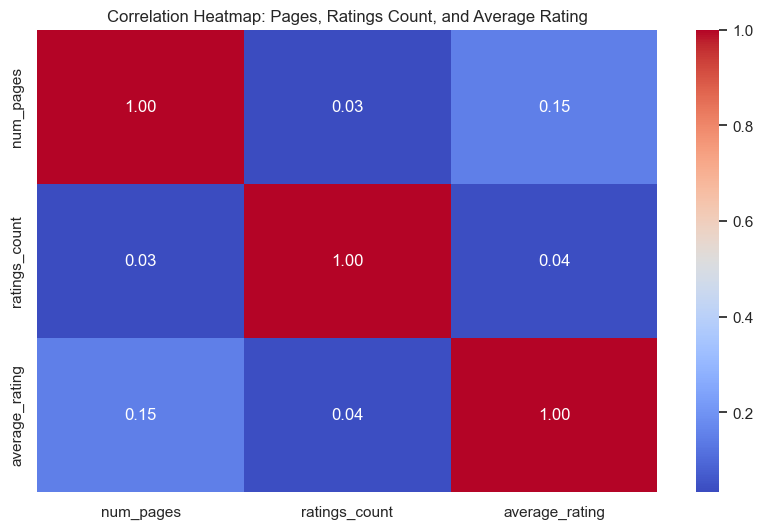

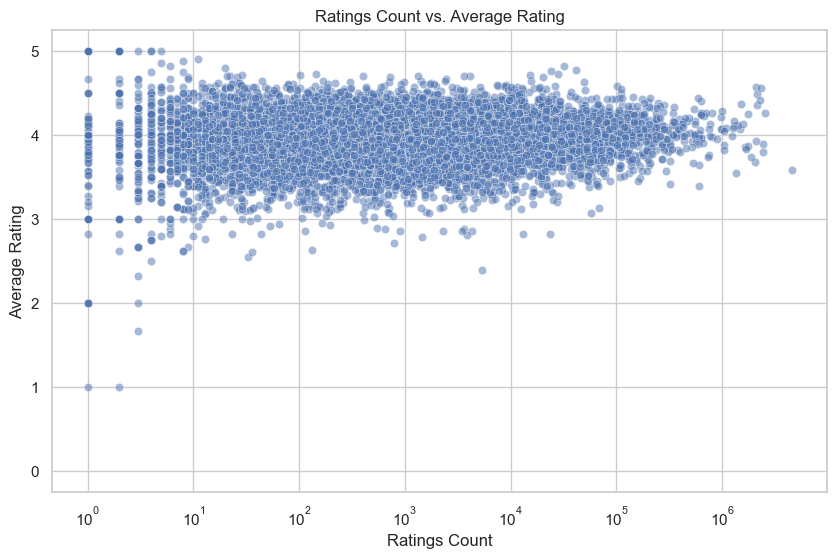

C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_7856\2060420927.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_ratings.values, y=publisher_ratings.index, palette='mako')


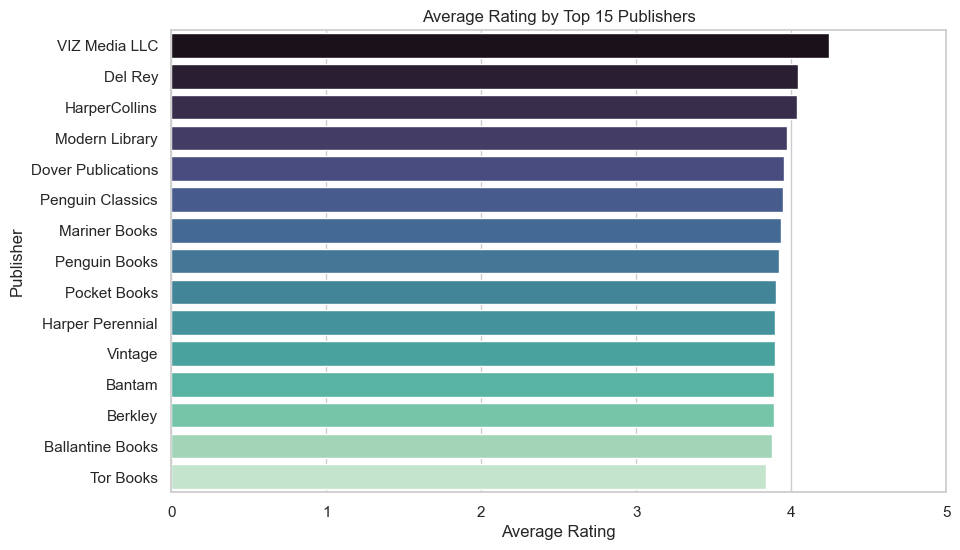

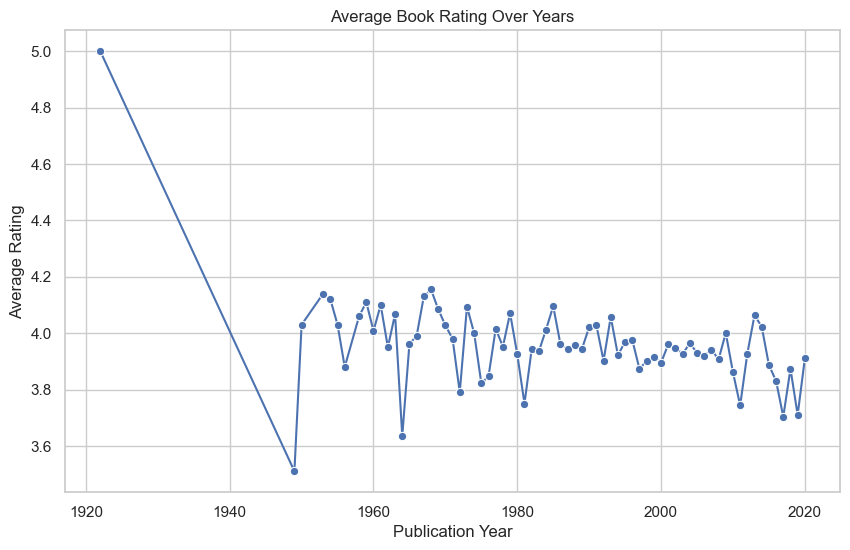

In [9]:
# Load and clean the data
df = pd.read_csv('books.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')
df['num_pages'] = pd.to_numeric(df['num_pages'], errors='coerce')
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
df['publication_year'] = df['publication_date'].dt.year

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Correlation matrix (num_pages, ratings_count, average_rating)
corr_df = df[['num_pages', 'ratings_count', 'average_rating']].dropna()
corr = corr_df.corr()

plt.figure()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Pages, Ratings Count, and Average Rating')
plt.show()

# 2. Scatter plot: ratings_count vs. average_rating
plt.figure()
sns.scatterplot(data=df, x='ratings_count', y='average_rating', alpha=0.5)
plt.title('Ratings Count vs. Average Rating')
plt.xlabel('Ratings Count')
plt.ylabel('Average Rating')
plt.xscale('log')  # Log scale to handle skew
plt.show()

# 3. Average rating by publisher (top 15 publishers by number of books)
top_publishers = df['publisher'].value_counts().nlargest(15).index
publisher_ratings = df[df['publisher'].isin(top_publishers)].groupby('publisher')['average_rating'].mean().sort_values(ascending=False)

plt.figure()
sns.barplot(x=publisher_ratings.values, y=publisher_ratings.index, palette='mako')
plt.title('Average Rating by Top 15 Publishers')
plt.xlabel('Average Rating')
plt.ylabel('Publisher')
plt.xlim(0, 5)
plt.show()

# 4. Ratings trend over years
ratings_by_year = df.groupby('publication_year')['average_rating'].mean().dropna()

plt.figure()
sns.lineplot(x=ratings_by_year.index, y=ratings_by_year.values, marker='o')
plt.title('Average Book Rating Over Years')
plt.xlabel('Publication Year')
plt.ylabel('Average Rating')
plt.show()

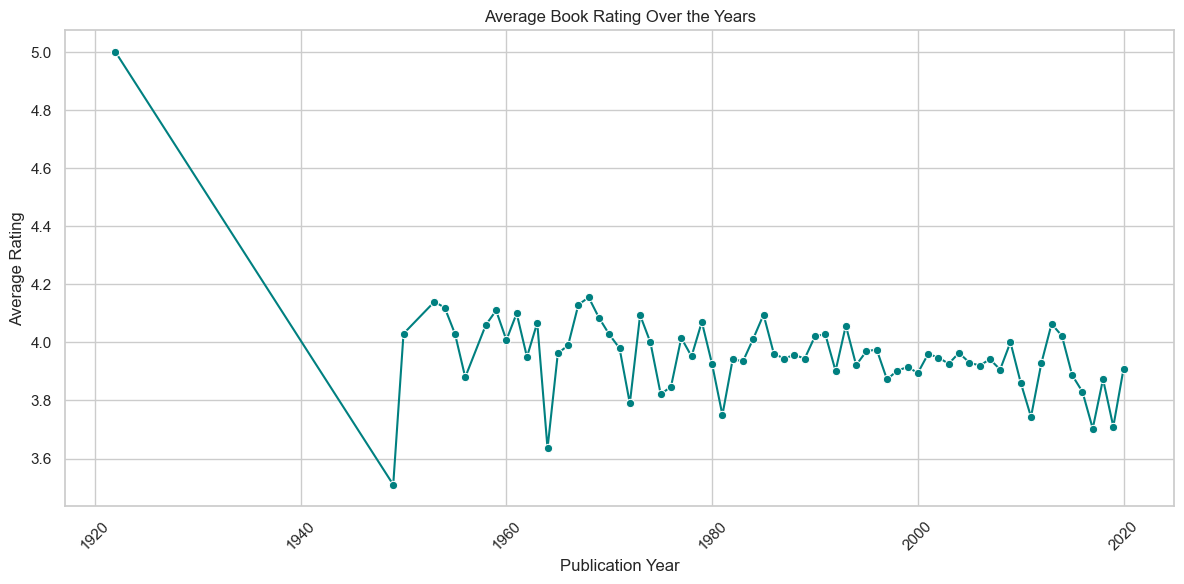

C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_7856\4082118005.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=books_published.index, y=books_published.values, palette='viridis')


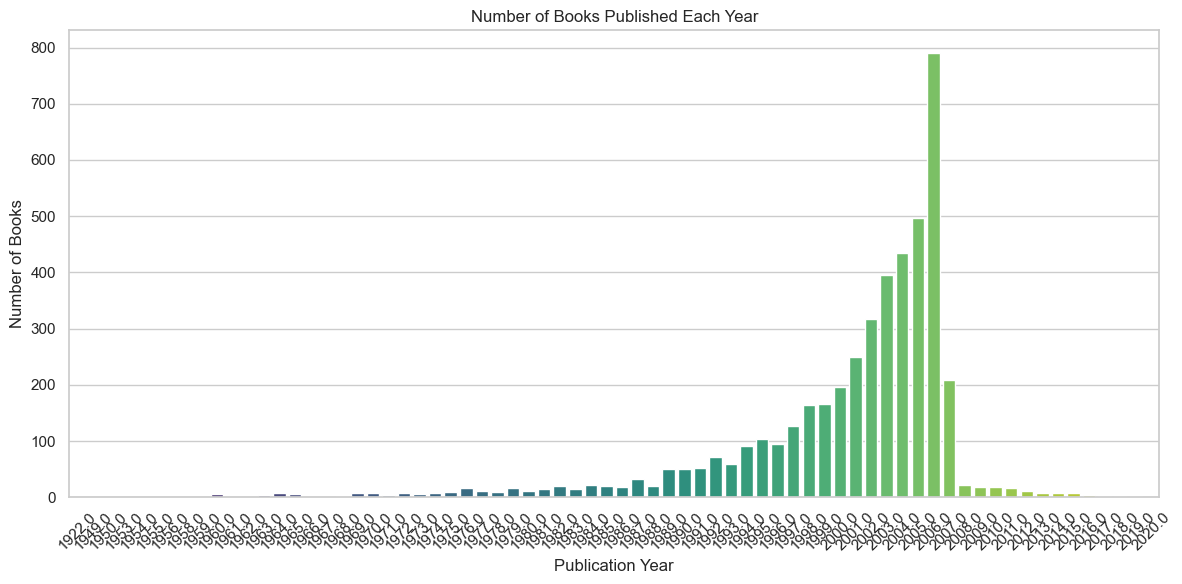

C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_7856\4082118005.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df.dropna(subset=['average_rating', 'decade']), x='decade', y='average_rating', palette='Set2')


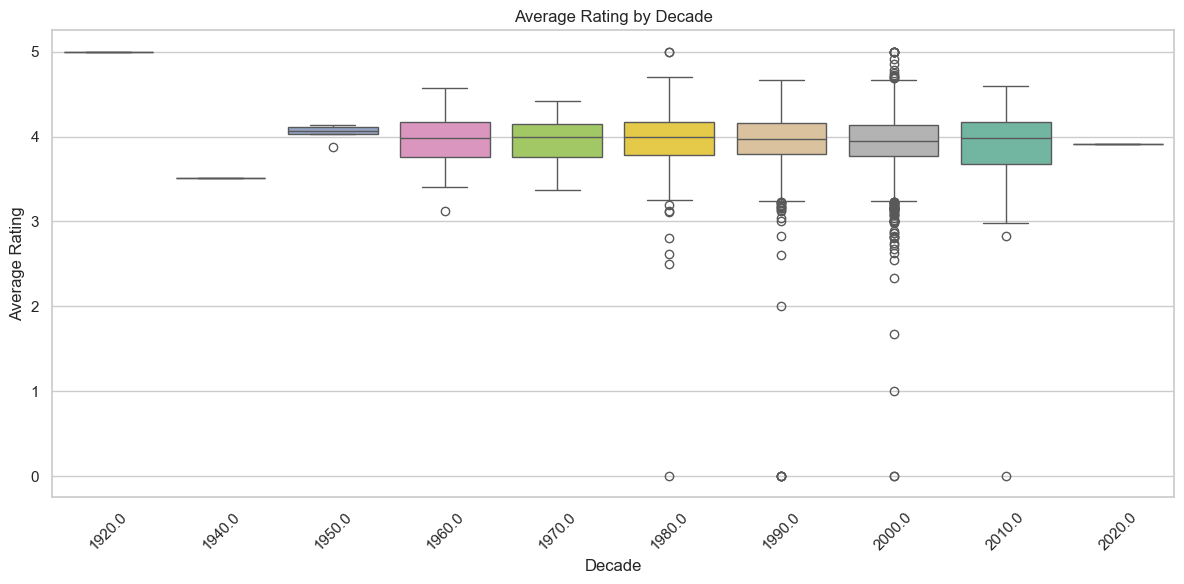

In [10]:
# Load and clean the data
df = pd.read_csv('books.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert columns to proper data types
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
df['publication_year'] = df['publication_date'].dt.year

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Trend of average rating over time
ratings_by_year = df.groupby('publication_year')['average_rating'].mean().dropna()

plt.figure()
sns.lineplot(x=ratings_by_year.index, y=ratings_by_year.values, marker='o', color='teal')
plt.title('Average Book Rating Over the Years')
plt.xlabel('Publication Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Most books published by year
books_published = df['publication_year'].value_counts().sort_index()

plt.figure()
sns.barplot(x=books_published.index, y=books_published.values, palette='viridis')
plt.title('Number of Books Published Each Year')
plt.xlabel('Publication Year')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Rating distribution across publication decades
df['decade'] = (df['publication_year'] // 10) * 10
plt.figure()
sns.boxplot(data=df.dropna(subset=['average_rating', 'decade']), x='decade', y='average_rating', palette='Set2')
plt.title('Average Rating by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_7856\2745175995.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='magma')
C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_7856\2745175995.py:24: UserWarning: Glyph 33618 (\N{CJK UNIFIED IDEOGRAPH-8352}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_7856\2745175995.py:24: UserWarning: Glyph 24029 (\N{CJK UNIFIED IDEOGRAPH-5DDD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_7856\2745175995.py:24: UserWarning: Glyph 24344 (\N{CJK UNIFIED IDEOGRAPH-5F18}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_7856\2745175995.py:24: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s

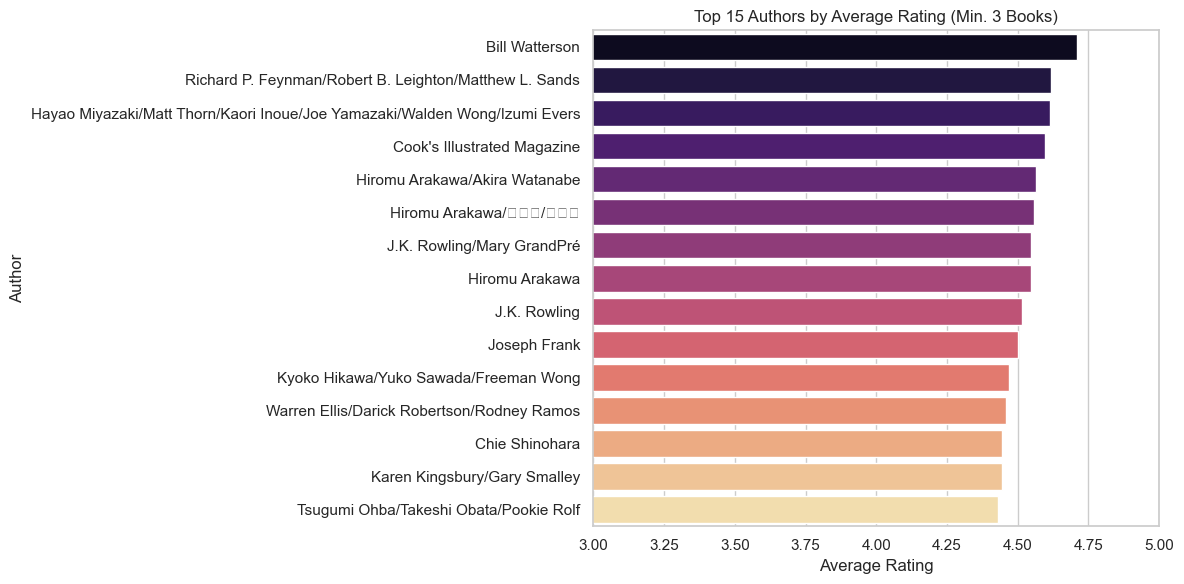

C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_7856\2745175995.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=publisher_subset, x='publisher', y='average_rating', palette='Set3')


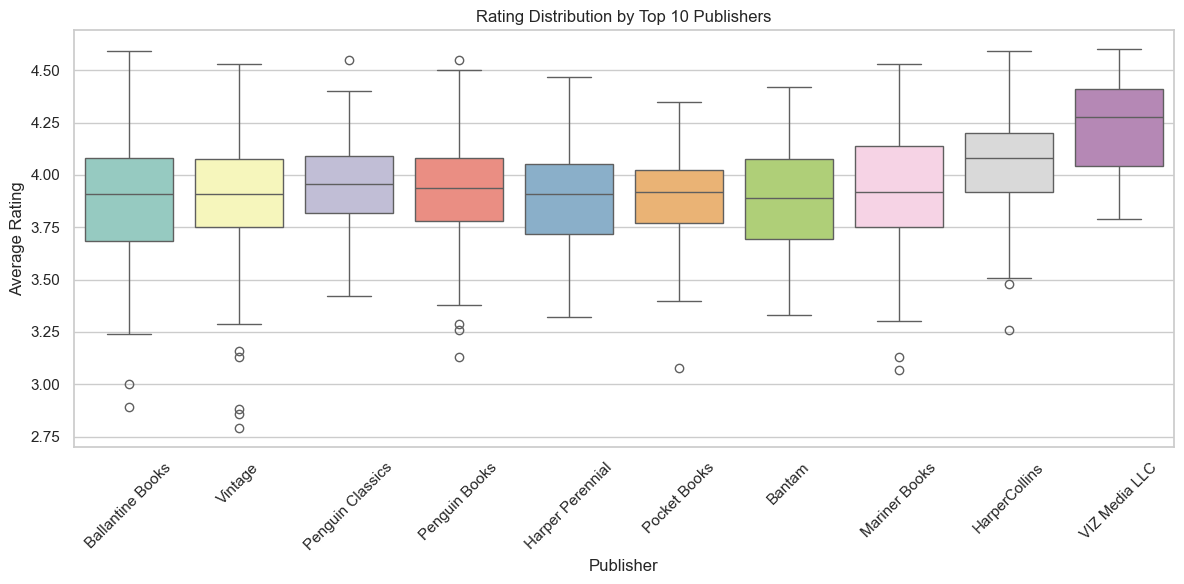

C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_7856\2745175995.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=author_subset, x='authors', y='average_rating', palette='coolwarm')


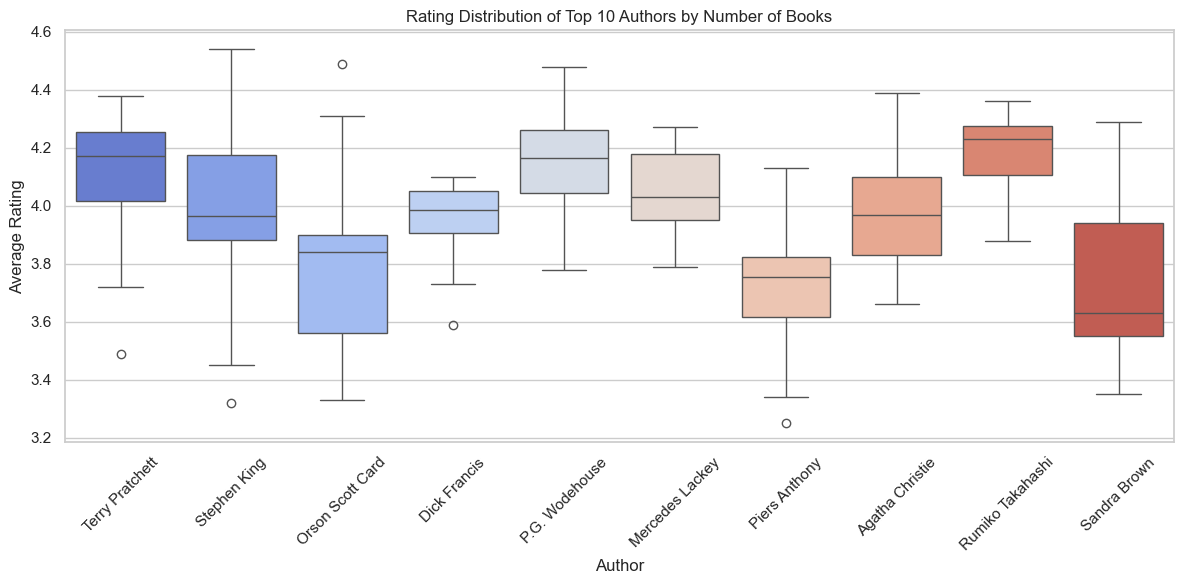

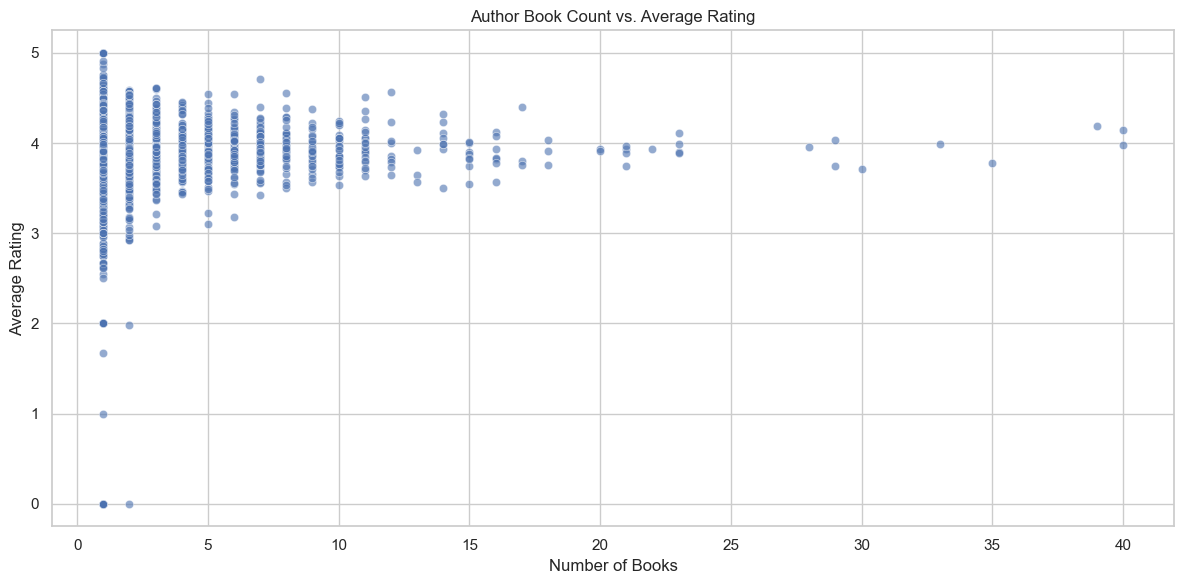

In [11]:
# Load and clean the data
df = pd.read_csv('books.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert relevant columns
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')
df['ratings_count'] = pd.to_numeric(df['ratings_count'], errors='coerce')
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

# Set seaborn style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Top Authors by Average Rating (min 3 books)
author_avg_rating = df.groupby('authors').filter(lambda x: len(x) >= 3)
top_authors = author_avg_rating.groupby('authors')['average_rating'].mean().sort_values(ascending=False).head(15)

plt.figure()
sns.barplot(x=top_authors.values, y=top_authors.index, palette='magma')
plt.title('Top 15 Authors by Average Rating (Min. 3 Books)')
plt.xlabel('Average Rating')
plt.ylabel('Author')
plt.xlim(3, 5)
plt.tight_layout()
plt.show()

# 2. Publisher Rating Distribution (Top 10 Publishers by Volume)
top_publishers = df['publisher'].value_counts().nlargest(10).index
publisher_subset = df[df['publisher'].isin(top_publishers)]

plt.figure()
sns.boxplot(data=publisher_subset, x='publisher', y='average_rating', palette='Set3')
plt.title('Rating Distribution by Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Author Rating Distribution (Top 10 Authors by Book Count)
top_authors_count = df['authors'].value_counts().nlargest(10).index
author_subset = df[df['authors'].isin(top_authors_count)]

plt.figure()
sns.boxplot(data=author_subset, x='authors', y='average_rating', palette='coolwarm')
plt.title('Rating Distribution of Top 10 Authors by Number of Books')
plt.xlabel('Author')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Correlation: Number of Books by Author vs. Their Average Rating
author_group = df.groupby('authors').agg(
    avg_rating=('average_rating', 'mean'),
    book_count=('title', 'count')
).reset_index()

plt.figure()
sns.scatterplot(data=author_group, x='book_count', y='avg_rating', alpha=0.6)
plt.title('Author Book Count vs. Average Rating')
plt.xlabel('Number of Books')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()